# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [1]:
import torch
from torch import nn
from torchvision import models

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Exemplo

In [30]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

#max_grad(model)

### 1. Função que recebe como entrada uma rede neural e retorna um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
* O maior e menor valor do parâmetro;
* O maior e menor valor do gradiente do parâmetro.


In [3]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from torchvision import models
import train

In [2]:
# Define a semente para garantir a reprodutibilidade

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

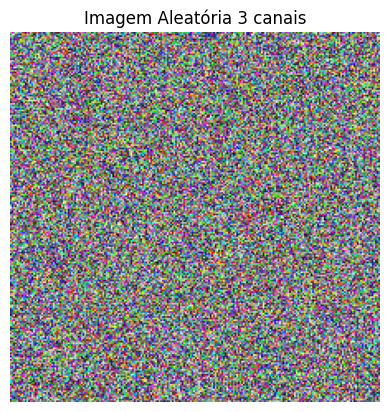

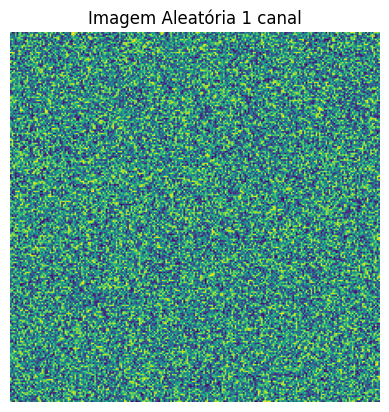

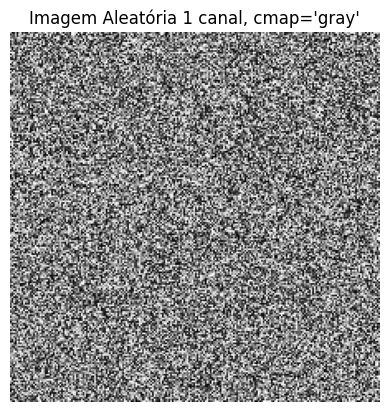

In [6]:
torch.manual_seed(42)

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
# img = torch.rand(1, 3, 8, 8)
img_bw = torch.rand(1, 1, 224, 224)

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Converter a imagem de tensor PyTorch para um formato compatível com matplotlib
# Remover a dimensão do batch
img_np = img.squeeze(0)
img_bw_np = img_bw.squeeze(0)

# Converter de formato [C, H, W] para [H, W, C]
img_np = img_np.permute(1, 2, 0).numpy()
img_bw_np = img_bw_np.permute(1, 2, 0).numpy()

# Plotar uma imagem colorida (3 canais)
plot_image(img_np, "Imagem Aleatória 3 canais")

# Plotar uma imagem em preto e branco (1 canal)
plot_image(img_bw_np, "Imagem Aleatória 1 canal")

# Plotar uma imagem em preto e branco (1 canal) com cmap='gray'
plot_image(img_bw_np, "Imagem Aleatória 1 canal, cmap='gray'", cmap='gray')

In [5]:
def plot_image(img, title, cmap=None):
    """Plota uma imagem com título especificado.
    
    Parâmetros:
        img (numpy.ndarray): A imagem a ser plotada.
        title (str): O título da imagem.
        cmap (str, opcional): O mapa de cores a ser usado ao plotar a imagem.
            Se None, a cor padrão será usada.
    """
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')  # Remove os eixos para uma visualização mais limpa
    plt.show()

In [7]:
def get_model_stats(model):
    """Retorna estatísticas dos parâmetros de um modelo neural.
    
    Para cada parâmetro, retorna o maior e menor valor do parâmetro
    e o maior e menor valor do gradiente do parâmetro.
    """
    stats = {}
    for param_name, param in model.named_parameters():
        # Valores do parâmetro
        param_max = param.max().item()
        param_min = param.min().item()
        
        # Valores do gradiente
        if param.grad is not None:
            grad_max = param.grad.max().item()
            grad_min = param.grad.min().item()
        else:
            grad_max = None
            grad_min = None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats
get_model_stats(model)

{'conv1.weight': {'param_max': 1.0164732933044434,
  'param_min': -0.8433799147605896,
  'grad_max': None,
  'grad_min': None},
 'bn1.weight': {'param_max': 0.5258306860923767,
  'param_min': -5.1095959463509644e-08,
  'grad_max': None,
  'grad_min': None},
 'bn1.bias': {'param_max': 0.6759758591651917,
  'param_min': -0.66438889503479,
  'grad_max': None,
  'grad_min': None},
 'layer1.0.conv1.weight': {'param_max': 0.6196322441101074,
  'param_min': -0.7993080019950867,
  'grad_max': None,
  'grad_min': None},
 'layer1.0.bn1.weight': {'param_max': 0.6440200805664062,
  'param_min': 0.16826024651527405,
  'grad_max': None,
  'grad_min': None},
 'layer1.0.bn1.bias': {'param_max': 0.3294556438922882,
  'param_min': -0.5315352082252502,
  'grad_max': None,
  'grad_min': None},
 'layer1.0.conv2.weight': {'param_max': 0.285553902387619,
  'param_min': -0.48791390657424927,
  'grad_max': None,
  'grad_min': None},
 'layer1.0.bn2.weight': {'param_max': 0.6240866780281067,
  'param_min': 0.113

### 1.1. Utilização da função criada




In [8]:
# # Criação de um modelo e cálculo dos gradientes como no notebook original
# img = torch.rand(1, 3, 224, 224)
# model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas
for param, stat in stats.items():
    print(f"{param}: {stat}")

conv1.weight: {'param_max': 1.0164732933044434, 'param_min': -0.8433799147605896, 'grad_max': 0.0008543323492631316, 'grad_min': -0.0007800475577823818}
bn1.weight: {'param_max': 0.5258306860923767, 'param_min': -5.1095959463509644e-08, 'grad_max': 0.0008010040037333965, 'grad_min': -0.0008218298316933215}
bn1.bias: {'param_max': 0.6759758591651917, 'param_min': -0.66438889503479, 'grad_max': 0.00013346191553864628, 'grad_min': -0.00020238087745383382}
layer1.0.conv1.weight: {'param_max': 0.6196322441101074, 'param_min': -0.7993080019950867, 'grad_max': 0.00021216970344539732, 'grad_min': -0.00022127585543785244}
layer1.0.bn1.weight: {'param_max': 0.6440200805664062, 'param_min': 0.16826024651527405, 'grad_max': 0.00031205167761072516, 'grad_min': -0.00030559851438738406}
layer1.0.bn1.bias: {'param_max': 0.3294556438922882, 'param_min': -0.5315352082252502, 'grad_max': 0.00026163150323554873, 'grad_min': -0.00034527989919297397}
layer1.0.conv2.weight: {'param_max': 0.285553902387619, '

### Teste

In [9]:
def get_model_stats(model):
    """Retorna estatísticas dos parâmetros de um modelo neural.
    
    Para cada parâmetro, retorna o maior e menor valor do parâmetro
    e o maior e menor valor do gradiente do parâmetro.
    """
    stats = {}
    for param_name, param in model.named_parameters():
        # Valores do parâmetro
        param_max = param.max().item()
        param_min = param.min().item()
        
        # Valores do gradiente
        grad_max = param.grad.detach().max().item() if param.grad is not None else None
        grad_min = param.grad.detach().min().item() if param.grad is not None else None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats

get_model_stats(model)

{'conv1.weight': {'param_max': 1.0164732933044434,
  'param_min': -0.8433799147605896,
  'grad_max': 0.0008543323492631316,
  'grad_min': -0.0007800475577823818},
 'bn1.weight': {'param_max': 0.5258306860923767,
  'param_min': -5.1095959463509644e-08,
  'grad_max': 0.0008010040037333965,
  'grad_min': -0.0008218298316933215},
 'bn1.bias': {'param_max': 0.6759758591651917,
  'param_min': -0.66438889503479,
  'grad_max': 0.00013346191553864628,
  'grad_min': -0.00020238087745383382},
 'layer1.0.conv1.weight': {'param_max': 0.6196322441101074,
  'param_min': -0.7993080019950867,
  'grad_max': 0.00021216970344539732,
  'grad_min': -0.00022127585543785244},
 'layer1.0.bn1.weight': {'param_max': 0.6440200805664062,
  'param_min': 0.16826024651527405,
  'grad_max': 0.00031205167761072516,
  'grad_min': -0.00030559851438738406},
 'layer1.0.bn1.bias': {'param_max': 0.3294556438922882,
  'param_min': -0.5315352082252502,
  'grad_max': 0.00026163150323554873,
  'grad_min': -0.00034527989919297397

### 2. Função que recebe o dicionário da função 1. e retorna o menor e maior valor dentre todos os parâmetros e todos os gradientes, sendo 4 valores no total.

In [10]:
def get_overall_stats(stats):
    """Retorna o menor e maior valor dentre todos os parâmetros e gradientes.

    Args:
        stats (dict): Dicionário com estatísticas dos parâmetros e gradientes.

    Returns:
        dict: Dicionário com os menores e maiores valores.
    """
    # Inicializa variáveis para armazenar os valores mínimos e máximos
    overall_param_min = float('inf')
    overall_param_max = float('-inf')
    overall_grad_min = float('inf')
    overall_grad_max = float('-inf')
    
    for param, values in stats.items():
        # Atualiza os valores mínimos e máximos dos parâmetros
        overall_param_min = min(overall_param_min, values['param_min'])
        overall_param_max = max(overall_param_max, values['param_max'])
        
        # Atualiza os valores mínimos e máximos dos gradientes, se disponíveis
        if values['grad_min'] is not None:
            overall_grad_min = min(overall_grad_min, values['grad_min'])
        if values['grad_max'] is not None:
            overall_grad_max = max(overall_grad_max, values['grad_max'])
    
    return {
        'overall_param_min': overall_param_min,
        'overall_param_max': overall_param_max,
        'overall_grad_min': overall_grad_min,
        'overall_grad_max': overall_grad_max
    }


### 2.1. Utilização da função
* Criação de um modelo e cálculo dos gradientes como no notebook original



In [11]:
# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas dos parâmetros individuais
#for param, stat in stats.items():
#    print(f"{param}: {stat}")

# Obtém as estatísticas gerais
overall_stats = get_overall_stats(stats)

# Exibe as estatísticas gerais
print("\nEstatísticas Gerais:")
print(f"Menor valor dos parâmetros: {overall_stats['overall_param_min']}")
print(f"Maior valor dos parâmetros: {overall_stats['overall_param_max']}")
print(f"Menor valor dos gradientes: {overall_stats['overall_grad_min']}")
print(f"Maior valor dos gradientes: {overall_stats['overall_grad_max']}")


Estatísticas Gerais:
Menor valor dos parâmetros: -0.8433799147605896
Maior valor dos parâmetros: 2.407539129257202
Menor valor dos gradientes: -0.001643659663386643
Maior valor dos gradientes: 2.9890928268432617


### 3. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**

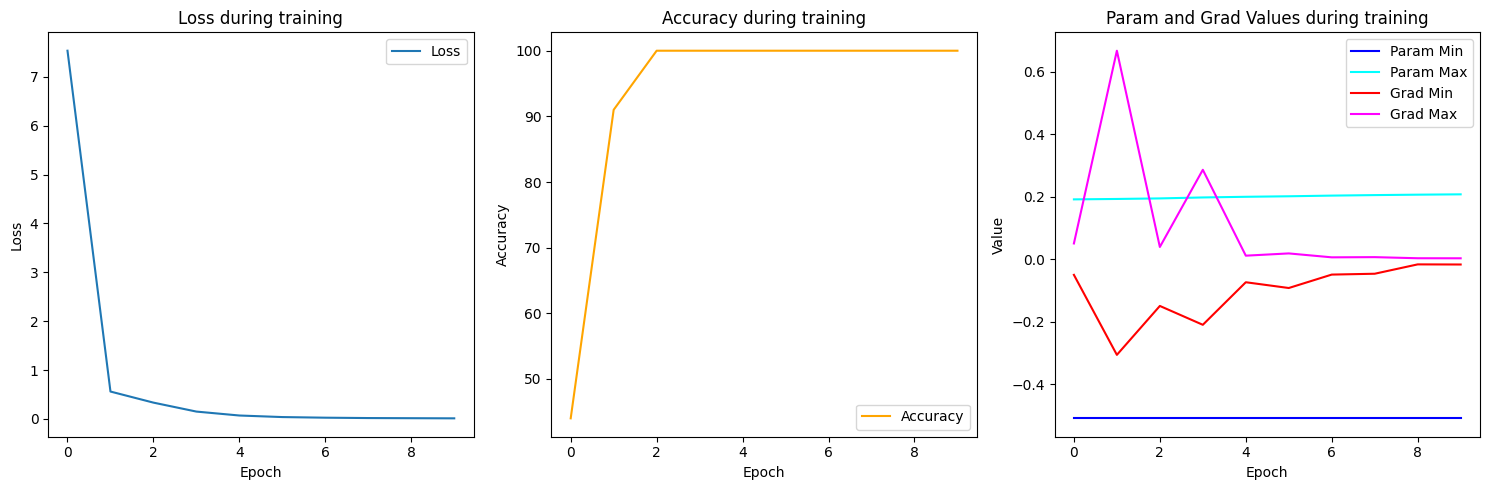

In [13]:
from IPython.display import clear_output

torch.manual_seed(42)
# Gerar dados aleatórios
img = torch.rand(100, 3, 224, 224)
targets = torch.randint(0, 2, (100,))  # 100 rótulos binários aleatórios

# Dataset e DataLoader
dataset = TensorDataset(img, targets)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Rede Neural Simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 224 * 224, 2)  # assuming output is 2 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

model = SimpleCNN()

def train(model, dataloader, num_epochs, lr):
    loss_func = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    
    losses = []
    accuracies = []
    param_min_values = []
    param_max_values = []
    grad_min_values = []
    grad_max_values = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in dataloader:
            optim.zero_grad()
            scores = model(inputs)
            loss = loss_func(scores, targets)
            loss.backward()
            optim.step()
            
            # Accumulate epoch statistics
            epoch_loss += loss.item()
            _, predicted = scores.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
        
        # Calculate accuracy for the epoch
        accuracy = 100. * correct / total
        losses.append(epoch_loss / len(dataloader))
        accuracies.append(accuracy)
        
        # Get overall stats
        stats = get_model_stats(model)
        overall_stats = get_overall_stats(stats)
        
        param_min_values.append(overall_stats['overall_param_min'])
        param_max_values.append(overall_stats['overall_param_max'])
        grad_min_values.append(overall_stats['overall_grad_min'])
        grad_max_values.append(overall_stats['overall_grad_max'])
        
        plot_training_metrics(losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values)

        clear_output(wait=True)
        
    return losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values
        
# Inicialização do modelo
model = SimpleCNN()

# Treinamento do modelo
num_epochs = 10
learning_rate = 0.01
losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values = train(model, dataloader, num_epochs, learning_rate)




In [12]:
# Funcao para plotar

def plot_training_metrics(losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values):
    """
    Plota os gráficos de métricas de treinamento: perda, acurácia, valores de parâmetros e gradientes.

    Args:
    - losses (list): Lista de perdas ao longo das épocas.
    - accuracies (list): Lista de acurácias ao longo das épocas.
    - param_min_values (list): Lista de valores mínimos dos parâmetros ao longo das épocas.
    - param_max_values (list): Lista de valores máximos dos parâmetros ao longo das épocas.
    - grad_min_values (list): Lista de valores mínimos dos gradientes ao longo das épocas.
    - grad_max_values (list): Lista de valores máximos dos gradientes ao longo das épocas.
    """
    plt.figure(figsize=(15, 5))

    # Plot de Perda
    plt.subplot(1, 3, 1)
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss during training')
    plt.legend()

    # Plot de Acurácia
    plt.subplot(1, 3, 2)
    plt.plot(accuracies, label='Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy during training')
    plt.legend()

    # Plot de Valores de Parâmetros e Gradientes
    plt.subplot(1, 3, 3)
    plt.plot(param_min_values, label='Param Min', color='blue')
    plt.plot(param_max_values, label='Param Max', color='cyan')
    plt.plot(grad_min_values, label='Grad Min', color='red')
    plt.plot(grad_max_values, label='Grad Max', color='magenta')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Param and Grad Values during training')
    plt.legend()

    plt.tight_layout()
    plt.show()

    

### Teste


In [36]:
import torch
import train
import matplotlib.pyplot as plt

# Exemplo fictício de uma classe de modelo
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

def plot_training_metrics_from_logger(logger):
    """
    Plota gráficos de métricas de treinamento usando o logger do pacote 'train'.

    Args:
    - logger (dict): Dicionário contendo os logs do treinamento.
    """
    epochs = range(len(logger['train_loss']))

    # Extraindo as métricas
    train_losses = logger['train_loss']
    valid_losses = logger['valid_loss']
    train_accuracies = logger.get('train_accuracy', [])
    valid_accuracies = logger.get('valid_accuracy', [])
    param_min_values = logger.get('param_min', [])
    param_max_values = logger.get('param_max', [])
    grad_min_values = logger.get('grad_min', [])
    grad_max_values = logger.get('grad_max', [])

    plt.figure(figsize=(15, 5))

    # Plot de Perda
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss during training')
    plt.legend()

    # Plot de Acurácia
    plt.subplot(1, 3, 2)
    if train_accuracies and valid_accuracies:
        plt.plot(epochs, train_accuracies, label='Train Accuracy', color='orange')
        plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy during training')
    plt.legend()

    # Plot de Valores de Parâmetros e Gradientes
    plt.subplot(1, 3, 3)
    if param_min_values and param_max_values and grad_min_values and grad_max_values:
        plt.plot(epochs, param_min_values, label='Param Min', color='blue')
        plt.plot(epochs, param_max_values, label='Param Max', color='cyan')
        plt.plot(epochs, grad_min_values, label='Grad Min', color='red')
        plt.plot(epochs, grad_max_values, label='Grad Max', color='magenta')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Param and Grad Values during training')
    plt.legend()

    plt.tight_layout()
    plt.show()
    plt.clf()  # Limpar a figura após a exibição

# Exemplo de uso
torch.random.manual_seed(0)
model = Model()
bs = 10
num_epochs = 30
lr = 0.1
weight_decay = 0.

logger = train.train(model, ds_train, ds_valid, bs=bs, num_epochs=num_epochs, lr=lr, 
                     weight_decay=weight_decay)
train.show_log(logger)

# Plotar as métricas usando o logger
plot_training_metrics_from_logger(logger)


AttributeError: module 'train' has no attribute 'train'

### Resolução 

**1.** Função que recebe como entrada uma rede neural e retorna um dicionário contendo como chave o nome do parametro do modelo e o maior e menor valor dos parâmetros, bem como dos gradientes dos parêmetros.

In [19]:
def param_stats(model):
    """Retorna um dicionário com estatísticas de cada parâmetro do modelo."""

    stats = {}
    for param_name, param in model.named_parameters():
        param_data = param.data
        grad = param.grad

        stats[param_name] = {
            'param_max': param_data.max().item(),
            'param_min': param_data.min().item(),
            'grad_max': grad.max().item() if grad is not None else None,
            'grad_min': grad.min().item() if grad is not None else None
        }
    # Assim as informacoes ficam na mesma linha, ruim pra ler
    #return stats 
    
    # Organiza as informacoes do dicionario
    return json.dumps(stats, indent=4)


In [20]:
import torch
import torch.nn as nn
import json

# Definindo um exemplo de modelo de rede neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Criando uma instância do modelo
model = SimpleNN()

# Exemplo de input
img = torch.randn(1, 1, 28, 28)

# Passando o input pelo modelo para gerar os scores
scores = model(img)

# Calculando os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtendo as estatísticas dos parâmetros e gradientes
stats = param_stats(model)
print(stats)

{
    "fc1.weight": {
        "param_max": 0.03571414574980736,
        "param_min": -0.03571318835020065,
        "grad_max": 1.4182225465774536,
        "grad_min": -1.1545414924621582
    },
    "fc1.bias": {
        "param_max": 0.03508118912577629,
        "param_min": -0.035579320043325424,
        "grad_max": 0.41145798563957214,
        "grad_min": -0.2378930300474167
    },
    "fc2.weight": {
        "param_max": 0.0883287861943245,
        "param_min": -0.08823124319314957,
        "grad_max": 1.4039839506149292,
        "grad_min": 0.0
    },
    "fc2.bias": {
        "param_max": 0.07323061674833298,
        "param_min": -0.08279189467430115,
        "grad_max": 1.0,
        "grad_min": 1.0
    }
}


**2.** Função que recebe o dicionário e retorna o valor máximo e mínimo dos parâmetros e gradientes dos parâmetros

In [25]:
def get_global_stats(stats):
    """Retorna o menor e maior valor dentre todos os parâmetros e gradientes."""
    param_max = float('-inf')
    param_min = float('inf')
    grad_max = float('-inf')
    grad_min = float('inf')

    for param_name, param_stats in stats.items():
        param_max = max(param_max, param_stats['param_max'])
        param_min = min(param_min, param_stats['param_min'])
        if param_stats['grad_max'] is not None:
            grad_max = max(grad_max, param_stats['grad_max'])
        if param_stats['grad_min'] is not None:
            grad_min = min(grad_min, param_stats['grad_min'])

    return {
        'param_max': param_max,
        'param_min': param_min,
        'grad_max': grad_max,
        'grad_min': grad_min
    }


In [37]:
global_stats = get_global_stats(stats)
for key, value in global_stats.items():
    print(f"{key}: {value}")


param_max: 0.0883287861943245
param_min: -0.08823124319314957
grad_max: 1.4182225465774536
grad_min: -1.1545414924621582


**3.** 

In [42]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from dataset import load_mnist
import train 
from param_stats import get_global_stats

def train_and_plot_stats(bs, num_epochs, lr, perf_func=accuracy, weight_decay=0.):
    # Carrega os datasets
    ds_train, ds_valid = load_mnist()
    dl_train = DataLoader(ds_train, batch_size=bs, shuffle=True)
    dl_valid = DataLoader(ds_valid, batch_size=bs, shuffle=False)

    # Inicializa o modelo
    model = SimpleNN()

    loss_func = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    logger = []
    global_stats = {'param_max': [], 'param_min': [], 'grad_max': [], 'grad_min': []}

    for epoch in range(num_epochs):
        loss_train = train_step(model, dl_train, optim, loss_func)
        loss_valid, perf = valid_step(model, dl_valid, loss_func, perf_func)
        logger.append((epoch, loss_train, loss_valid, perf))

        # Atualiza os valores de menor e maior dos parâmetros e gradientes
        stats = get_global_stats(model)
        for key in global_stats.keys():
            global_stats[key].append(stats[key])

        show_log(logger)

    return logger, global_stats

# Exemplo de uso
bs = 64
num_epochs = 10
lr = 0.01

logger, global_stats = train_and_plot_stats(bs, num_epochs, lr)

# Plotagem dos valores de menor e maior dos parâmetros e gradientes ao longo do treinamento
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, global_stats['param_max'], label='param_max')
plt.plot(epochs, global_stats['param_min'], label='param_min')
plt.plot(epochs, global_stats['grad_max'], label='grad_max')
plt.plot(epochs, global_stats['grad_min'], label='grad_min')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Values of Parameters and Gradients')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'param_stats'